In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from network_model import *

import sys
#!{sys.executable} -m pip install [arg]
import time

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [3]:
N = 1250
g = nx.powerlaw_cluster_graph(n=N, m=2, p=0.5)

In [17]:
timea = time.time()
W, I, C, A, R, P, A_vals, GAMBLE_SUCCESS, T, communities = simulation(NUM_AGENTS=N,
                                                                   STEPS=50,
                                                                   PROJECT_COST=0.1,
                                                                   graph=g,
                                                                   seed=123,
                                                                   RL=1.4,
                                                                   RR=1.5,
                                                                   SAFE_RETURN=1.05)
print(time.time()-timea)

256 communities.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pymarkowitz/Optimizer.py:368: UserWarning: "Detected no beta input. Will not be able to perform any beta-related optimization.
  warnings.warn(""""Detected no beta input. Will not be able to perform any beta-related optimization.""")


Performing time stepping...


100%|██████████| 50/50 [00:16<00:00,  3.10it/s]

21.204785346984863


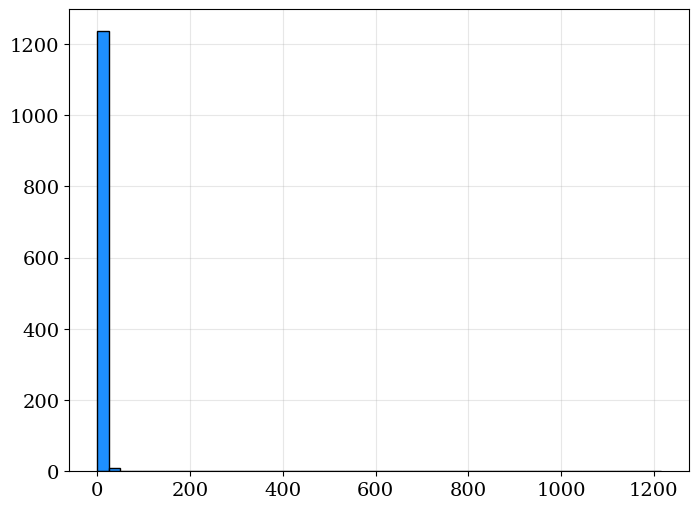

In [18]:
plt.hist(W[-1], bins=50, color="dodgerblue", edgecolor="k")
plt.show()

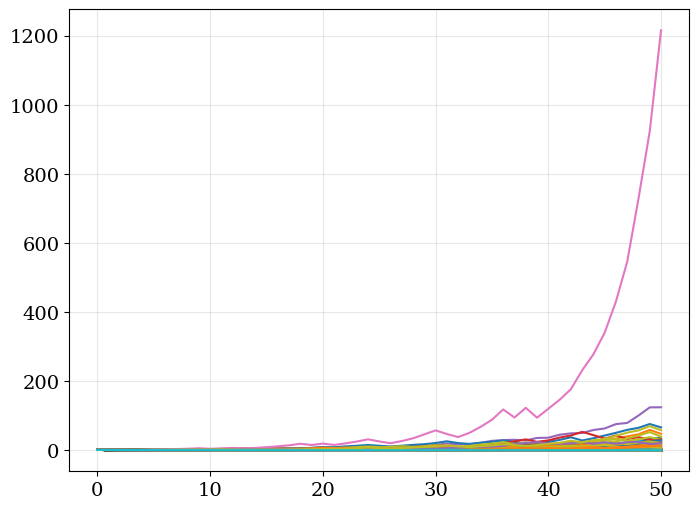

In [19]:
for i in range(W.shape[1]):
    plt.plot(W[:,i])

plt.show()

In [46]:
P

{0: [array([1.21271499e-02, 1.59439829e-02, 2.13288237e-02, 4.39200415e-02,
         2.53771472e-03, 1.89006200e-02, 1.19180431e-02, 1.73689154e-02,
         1.77208400e-04, 7.56140626e-03, 1.67422953e-02, 2.14124281e-02,
         3.06247864e-02, 2.36977051e-02, 2.95574304e-02, 3.62692712e-02,
         4.45443295e-03, 1.41124265e-02, 3.09707579e-02, 2.56541609e-02,
         1.86907694e-02, 2.11580749e-02, 2.54412943e-02, 1.80750807e-02,
         3.13983307e-02, 1.52369734e-02, 4.04119755e-02, 7.78691432e-03,
         2.13639564e-02, 2.80901296e-02, 1.78079394e-02, 1.96731998e-02,
         4.07547627e-02, 3.47706299e-02, 2.58928717e-02, 9.01168998e-03,
         2.39155806e-01]),
  array([6.53273620e-02, 8.01891205e-03, 9.26654757e-02, 6.95278894e-02,
         1.27632545e-03, 9.50593148e-03, 5.99409442e-03, 9.85578272e-02,
         8.91256958e-05, 4.29287225e-02, 8.42041754e-03, 1.07692274e-02,
         1.54025170e-02, 1.19185911e-02, 1.48656980e-02, 3.60100053e-02,
         2.24032516e-

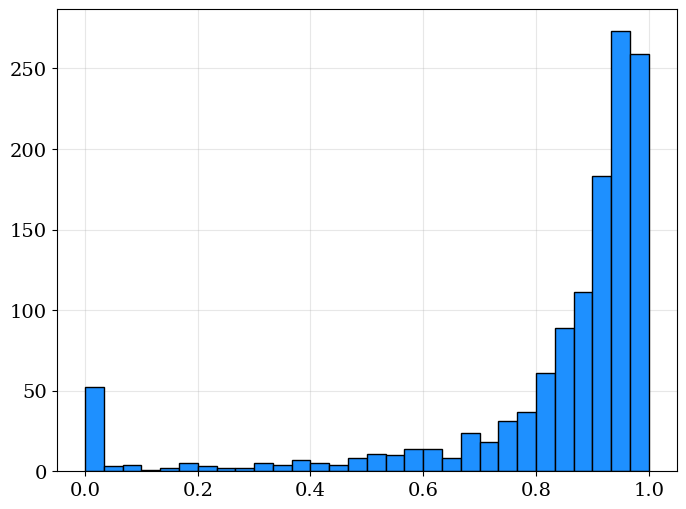

In [47]:
plt.hist([P[i][-1][-1] for i in range(N)], bins=30, color="dodgerblue", edgecolor='k')
plt.show()

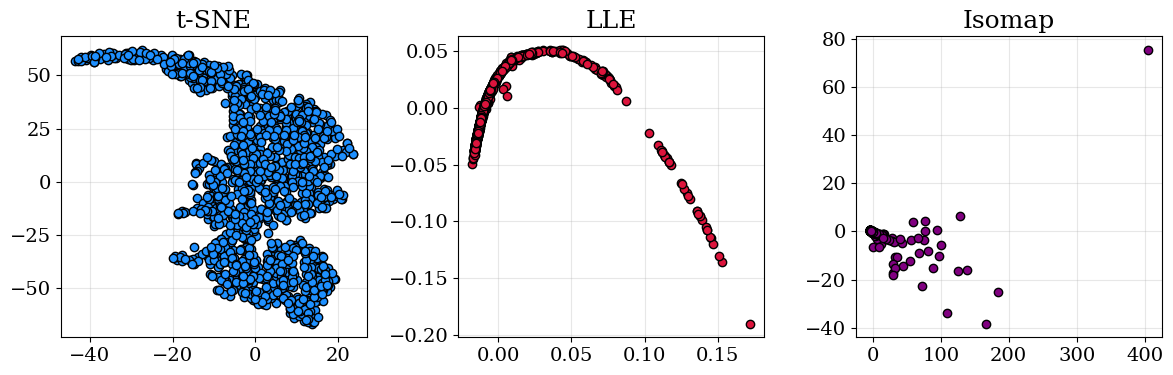

In [58]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap

fig, axs = plt.subplots(1,3, figsize=(12,4))
colors = ["dodgerblue", "crimson", "purple"]
titles = ["t-SNE", "LLE", "Isomap"]
kwargs = [{"perplexity":30}, {"method":"modified"}, {}]

for i,algo in enumerate([TSNE, LocallyLinearEmbedding, Isomap]):
    X = algo(n_components=2, **kwargs[i]).fit_transform(W.T)
    axs[i].scatter(X[:,0], X[:,1], c=colors[i], edgecolor="k")
    axs[i].set_title(titles[i])

fig.tight_layout()
plt.show()

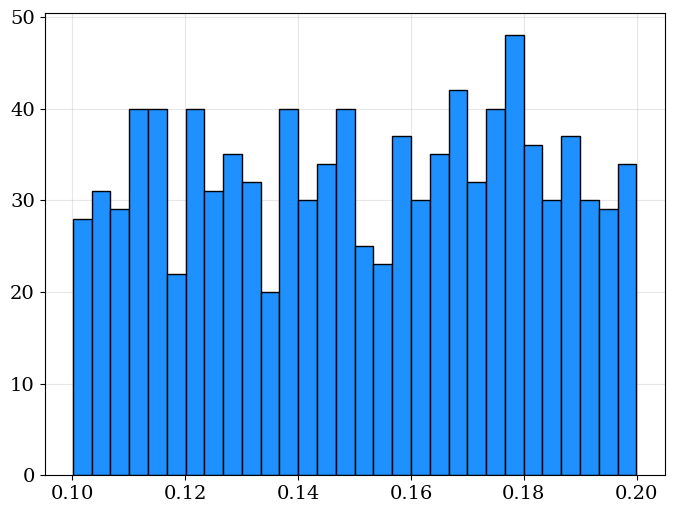

In [113]:
plt.hist(C[0], color="dodgerblue", edgecolor="k", bins=30)
plt.show()

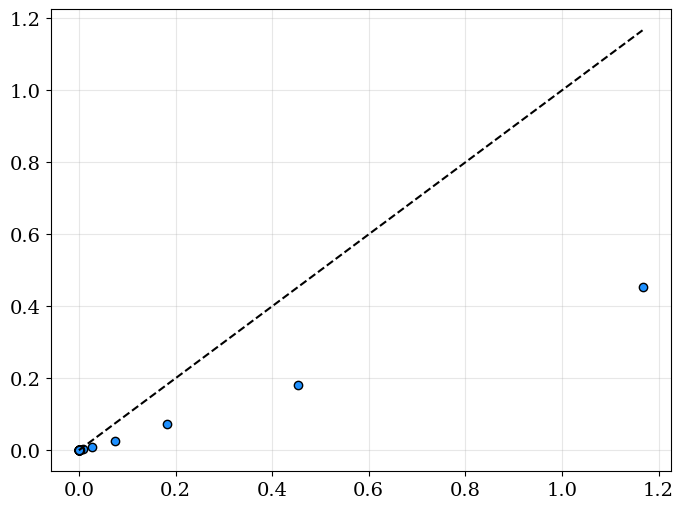

In [13]:
i = 10

x=[]
y=[]
for k in range(len(W)-1):
    x.append(W[k][i])
    y.append(W[k+1][i])

plt.scatter(x,y, color="dodgerblue", edgecolor="k")
plt.plot(np.linspace(min(x), max(x), 100), np.linspace(min(x), max(x), 100), color="k", linestyle="dashed")
plt.show()